# SI 370 - Homework #2: Data Visualization

For this homework assignment, you will use a dataset similar to one we used in an earlier lecture: the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions. We will go over some planning in class together so you get a feel for what you need to do.

Each of the 5 questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

<hr>

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

And let's read the data (note: you might need to include path information if the data files are not in the same folder as this notebook):

In [144]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [145]:
datasets = [movies, ratings, tags]
for data in datasets:
    display(data.head(3))

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year.

In [146]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [147]:
movies['Year'] = movies.title.str.extract(r'(\d{4})')

In [148]:
movies.dropna(subset=['Year'], inplace=True)
# movies.loc[movies['Year'].isnull()]
movies.head(3)

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995


In [149]:
movies.Year.info() # No null values

<class 'pandas.core.series.Series'>
Int64Index: 9730 entries, 0 to 9741
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
9730 non-null   object
dtypes: object(1)
memory usage: 152.0+ KB


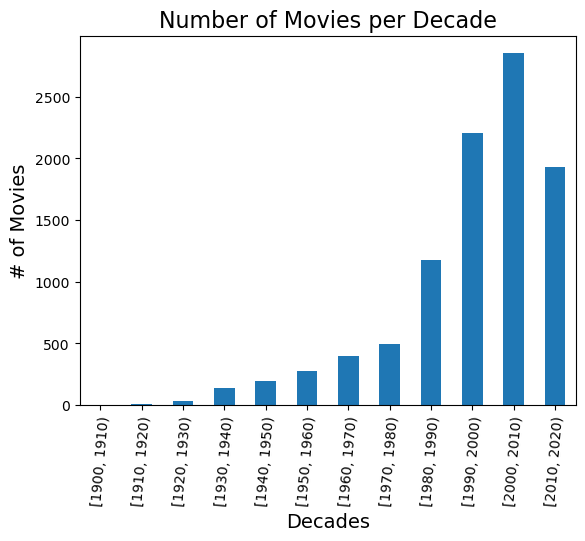

In [150]:
movies['Year'] = movies.Year.apply(lambda x: int(x))
movies['decades'] = pd.cut(movies['Year'],
                           bins=[1900, 1910, 1920, 1930, 1940, 1950, 1960,
                                 1970, 1980, 1990, 2000, 2010, 2020],
                           right=False)
ax = movies.decades.value_counts(sort=False).plot.bar()
ax.set_ylabel('# of Movies', fontsize=14)
ax.set_xlabel('Decades', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)
ax.set_title(label='Number of Movies per Decade', fontsize=16)
plt.show()

The visualization above is a bar chart depicting the number of movies for each decade from the 1900s to the 2010s. The number of movies steadily increases with each decade on the graph, and peaks in the decade of 2000-2010. The number of movies likely also correlates to the popularity of the movie industry, with this form of entertainment steadily rising in popularity with each succeeding year.

### Q2: 
Create a visualization that shows the number of movies in each genre.

Be sure that your axis labels are legible!

In [151]:
movies['genres'] = movies['genres'].str.split('|')
movies = movies.explode('genres')

In [152]:
order = movies.groupby('genres', as_index=True).size()
order = order.sort_values(ascending=False)
order

genres
Drama                 4359
Comedy                3756
Thriller              1892
Action                1827
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 978
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      26
dtype: int64

C:\Users\thebe\anaconda3\envs\si370fa22\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


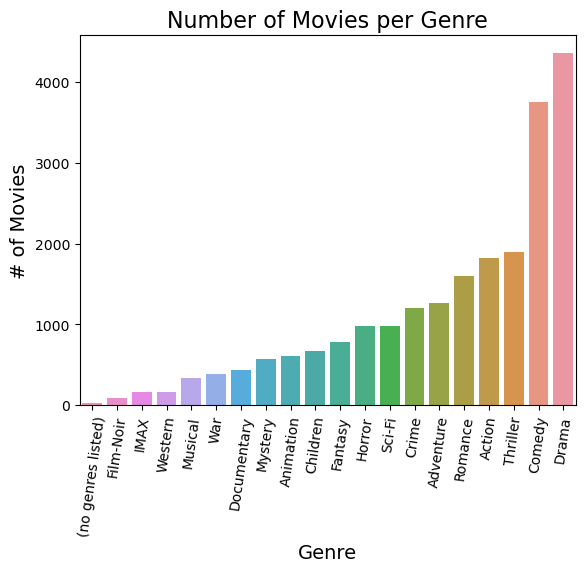

In [153]:
ax = sns.countplot(movies.genres, order=order.index)
# ax.yaxis.grid(visible=True, which='major')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set_ylabel('# of Movies', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=82)
ax.set_title(label='Number of Movies per Genre', fontsize=16)
ax.invert_xaxis()
plt.show()

The visualization above depicts the number of movies listed in each genre ordered by lowest to highest number of movies. The top five categories by number of movies are, in order, drama, comedy, thriller, action, and romance. The top genre, drama, has 4,359 films listed in the dataset. This is 600 films more than the second highest genre of comedy, and an astonishing 2,400 more than the third highest genre of thriller. 

### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  (Hint: use countplot)

In [154]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

C:\Users\thebe\anaconda3\envs\si370fa22\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


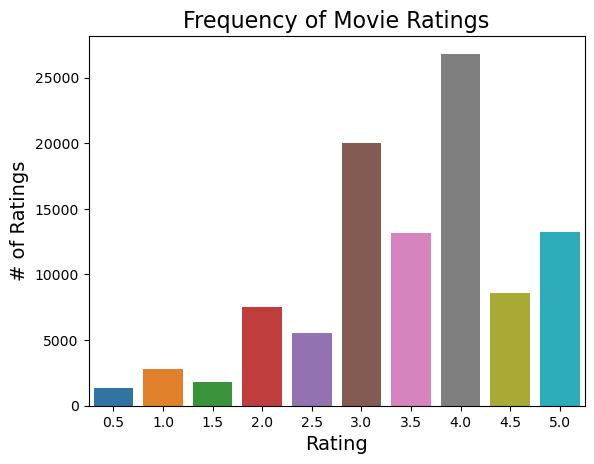

In [155]:
ax = sns.countplot(ratings.rating)
ax.set_ylabel('# of Ratings', fontsize=14)
ax.set_xlabel('Rating', fontsize=14)
ax.set_title(label='Frequency of Movie Ratings', fontsize=16)
plt.show()

This visualization shows the number of ratings based on the score given for said ratings. The whole number ratings are seen significantly more relative to the half number ratings. The highest four ratings are, from highest to lowest, 4.0, 3.0, 5.0, and 3.5. This would mean that many movie raters consider most movies as average or above. There is a very low percentage of movies that are rated with a 2.0 rating or below.

### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

In [156]:
ratings['timestamp'] = ratings.timestamp.apply(
    lambda x: pd.to_datetime(x, unit='s'))

<AxesSubplot:xlabel='timestamp', ylabel='rating'>

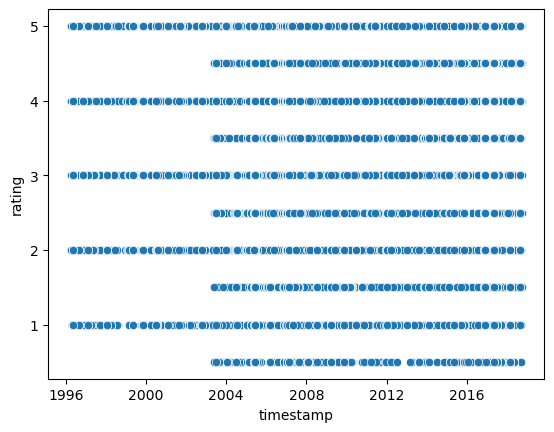

In [157]:
sns.scatterplot(data=ratings, x='timestamp', y='rating')

From this scatterplot showing the ratings of movies over time, we can see that the half ratings only began being recorded around 2003-2004. This is why these half-number ratings are seen less in the bar chart above relative to the number of whole-number ratings.

### Q4 a:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [158]:
print('Users: ' + str(max(ratings.userId)) +
      '\nDates: ' + str(min(ratings.timestamp)) +
      ' - ' + str(max(ratings.timestamp)))

Users: 610
Dates: 1996-03-29 18:36:55 - 2018-09-24 14:27:30


This code illustrates the max user ID within the dataset, which means that there were 610 users who created ratings. The earliest (minimum) timestamp in the dataset is March 29, 1996, and the latest (maximum) timestamp is September 24, 2018.

### Q4 b:
Create a visualization showing the number of ratings produced on each day of the week.  

Make sure your axis labels are in a reasonable order.

In [159]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [160]:
ratings['weekday'] = ratings.timestamp.apply(lambda x: x.strftime('%A'))

In [161]:
day_counts = ratings.weekday.value_counts(sort=True)
daydf = pd.DataFrame(data=day_counts, index=daynum)
daydf

,weekday
Sunday,16209
Monday,17583
Tuesday,16411
Wednesday,14014
Thursday,10706
Friday,14455
Saturday,11458


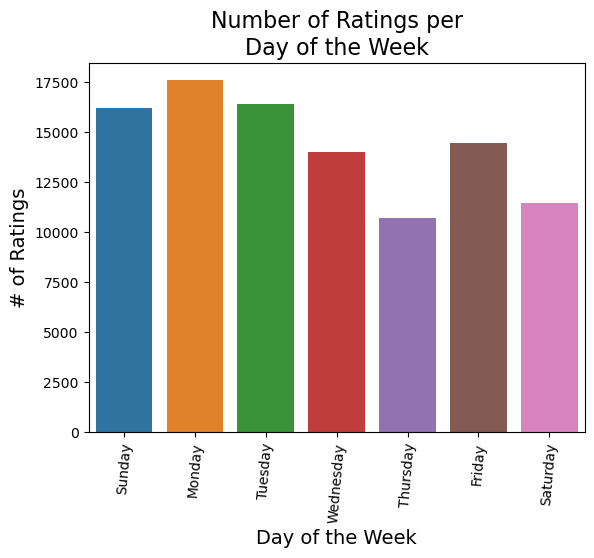

In [162]:
ax = sns.barplot(x=daydf.index, y=daydf.weekday, order=daydf.index)
ax.set_ylabel('# of Ratings', fontsize=14)
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)
ax.set_title(label='Number of Ratings per\nDay of the Week', fontsize=16)
plt.show()

This visualization illustrates the number of ratings created per day of the week. The highest number of ratings are created on Sunday, Monday, and Tuesday. The lowest number of ratings are made on Thursday and Saturday. This may be because these movie-watchers see these movies over the weekend and then rate them at the beginning of the following week.

### Q5a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of characters in the tag.

In [167]:
tags['taglength'] = tags.tag.apply(lambda x: len(x))
tags.sort_values(by='taglength', ascending=False).sample(5)

,userId,movieId,tag,timestamp,taglength
3096,567,26717,symbolic,1525285896,8
3215,567,112421,quirky,1525283419,6
814,424,2505,Nicolas Cage,1457902180,12
1446,474,1416,Andrew Lloyd Weber,1137374117,18
589,318,64034,friendship,1242160427,10


### Q5b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

In [168]:
tags.taglength.value_counts().head(10)

6     444
5     340
9     340
11    328
8     322
7     294
10    279
12    248
13    202
16    194
Name: taglength, dtype: int64

In [169]:
tags.taglength.describe()

count    3683.000000
mean       10.140646
std         4.862452
min         2.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        85.000000
Name: taglength, dtype: float64

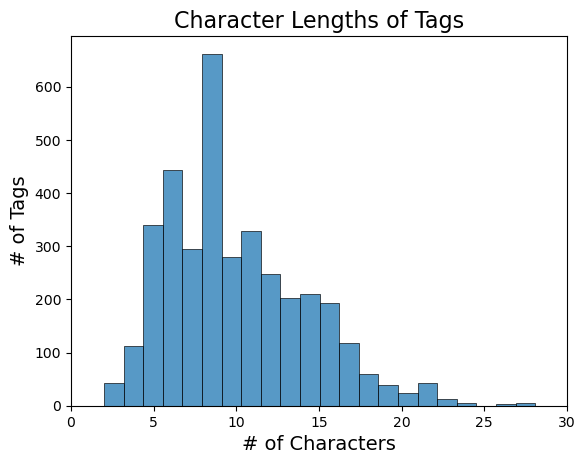

In [170]:
ax = sns.histplot(tags.taglength, bins=70)
ax.set_ylabel('# of Tags', fontsize=14)
ax.set_xlabel('# of Characters', fontsize=14)
ax.set_title(label='Character Lengths of Tags', fontsize=16)
plt.xlim(0,30)
plt.show()

This visualization illustrates the number of tags based on the character length of the tags. The plot follows a normal distribution bell curve. It has a mean of 10.14 characters and a standard deviation of 4.86 characters. The max number of characters for a tag found in the dataset is 85, and the minimum number of characters is 2. 

## END OF NOTEBOOK